# Naive Bayes Classification

## Objectives

- Explore the application and effectiveness of Naive Bayes classification in different scenarios.
- Compare Gaussian and Multinomial Naive Bayes approaches.
- Assess model accuracy through performance metrics like confusion matrices and accuracy scores.

## Background

Naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. They are particularly suited for high-dimensional data and are known for their simplicity and efficiency.

## Datasets Used

- Synthetic Blob Data: Used to demonstrate binary classification with Gaussian Naive Bayes.
- Raisin Dataset: Involves classification of raisin varieties using physical attributes, employing Gaussian Naive Bayes.
- Text Messages: Utilized for spam detection in a simple example of Multinomial Naive Bayes.

## Introduction

Naive Bayes is a popular machine learning algorithm that is useful in a variety of applications. They are simple, fast, efficient and robust to irrelevant features.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 10)
import seaborn as sns;

In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

## A Simple Naive Bayes Model

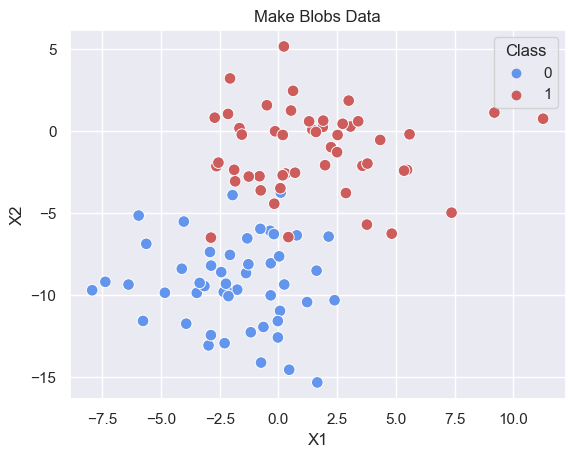

In [3]:
# The data
X, cl = make_blobs(n_samples=100, n_features=2, centers=2, random_state=2, cluster_std=2.5)
dfb = pd.DataFrame()
dfb['X1'] = X[:,0]
dfb['X2'] = X[:,1]
dfb['Class'] = cl
sns.scatterplot(x=dfb.X1, y=dfb.X2, s=70, hue=dfb.Class, 
                palette=['cornflowerblue', 'indianred']).set_title("Make Blobs Data");

In [4]:
X = dfb[['X1','X2']]    # Feature Matrix
y = dfb.Class           # Target variable

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)
print('Train = %i cases \t Test = %i cases' %(len(X_train), len(X_test)))

Train = 80 cases 	 Test = 20 cases


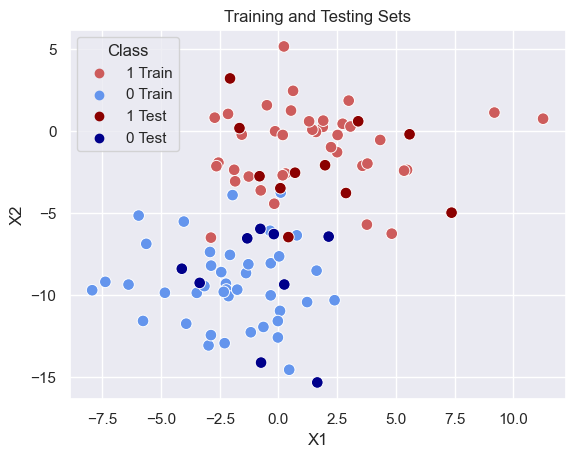

In [6]:
# Graphing the training and test sets
sns.scatterplot(x=X_train.X1, y=X_train.X2, s=70, hue=y_train.replace({0:'0 Train', 1:'1 Train'}), 
                palette=['indianred', 'cornflowerblue'])
sns.scatterplot(x=X_test.X1,  y=X_test.X2,  s=70, hue=y_test.replace({0:'0 Test', 1:'1 Test'}),    
                palette=['darkred', 'darkblue']).set_title("Training and Testing Sets");

In [7]:
# Saving training and testing data
data_train = pd.concat([X_train, y_train], axis=1)
data_test  = pd.concat([X_test, y_test], axis=1)

In [8]:
# Initialize The Gaussian Naive Bayes
nb_g = GaussianNB()

In [9]:
# Train the model
nb_g.fit(X=X_train, y=y_train)

GaussianNB()

In [10]:
# Predictions with training cases 
prob = nb_g.predict_proba(X_train).round(3)
data_train['prob_0'] = prob[:,0]
data_train['prob_1'] = prob[:,1]
data_train['Class_pr'] = nb_g.predict(X_train)
data_train.head()

,X1,X2,Class,prob_0,prob_1,Class_pr
85,-1.884258,-2.359858,1,0.046,0.954,1
28,0.781656,-6.360943,0,0.796,0.204,0
8,-2.913228,-7.375335,0,0.989,0.011,0
11,4.332165,-0.536979,1,0.000,1.000,1
63,0.233033,5.169685,1,0.000,1.000,1


In [11]:
# Predictions on unseen cases 
prob = nb_g.predict_proba(X_test)
data_test['prob_0'] = prob[:,0]
data_test['prob_1'] = prob[:,1]
data_test['Class_pr'] = nb_g.predict(X_test)
data_test.head()

,X1,X2,Class,prob_0,prob_1,Class_pr
26,0.082052,-3.483501,1,0.087003,9.129967e-01,1
80,1.653727,-15.340483,0,0.999999,7.260652e-07,0
82,7.369345,-4.976485,1,0.002689,9.973110e-01,1
68,1.984550,-2.080096,1,0.004265,9.957353e-01,1
77,-3.352940,-9.262200,0,0.999375,6.250228e-04,0


In [12]:
# Generating new data
new_data = pd.DataFrame()
new_data['X1'] = np.random.uniform(data_train.X1.min(), data_train.X1.max(), size=1000)
new_data['X2'] = np.random.uniform(data_train.X2.min(), data_train.X2.max(), size=1000)
new_y  = nb_g.predict(new_data)
new_data['y'] = new_y

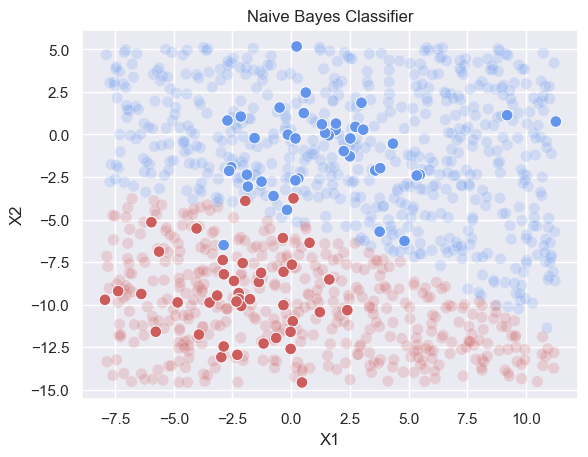

In [13]:
# Plotting boundaries
sns.scatterplot(x=new_data.X1,  y=new_data.X2,  s=70, hue=new_data.y, alpha=0.2, 
                palette=['indianred', 'cornflowerblue'], legend=False).set_title("Naive Bayes Classifier")
sns.scatterplot(x=X_train.X1, y=X_train.X2, s=70, hue=y_train, 
                palette=['indianred', 'cornflowerblue'], legend=False);

In [14]:
# Confusion Matrix
metrics.confusion_matrix(y_true=data_test.Class,          # True labels
                         y_pred=data_test.Class_pr)       # Predicted labels

array([[ 9,  0],
       [ 1, 10]], dtype=int64)

Classification accuracy is a performance metric that measures how well a classification model can accurately classify or predict the correct class label for a given input. It is the ratio of correctly classified instances to the total number of cases in the dataset.

In [15]:
# The accuracy
print('Training Set Accuracy = %.3f' %(nb_g.score(X=X_train, y=y_train)))
print('Testing Set  Accuracy = %.3f' %(nb_g.score(X=X_test,  y=y_test)))

Training Set Accuracy = 0.963
Testing Set  Accuracy = 0.950


## Gaussian Naive Bayes: The Raisin Dataset

The dataset contains information about two varieties of raisins (Kecimen and Besni) grown in Turkey.

In [16]:
dfr = pd.read_csv('Raisin.csv')
print(dfr.shape)
dfr.head()

(900, 8)


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


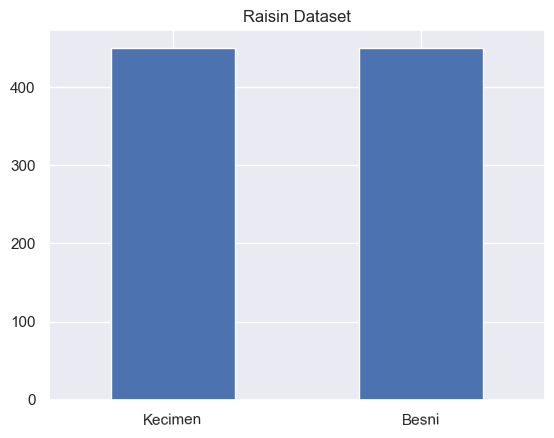

In [17]:
dfr.Class.value_counts().plot(kind='bar', rot=True, title='Raisin Dataset');

In [18]:
# Recoding the class variable
label_to_number = {'Kecimen': 0, 'Besni': 1}
dfr['Besni'] = dfr['Class'].map(label_to_number)
dfr.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,Besni
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen,0


In [19]:
# Target variable
yr = dfr.Besni                              

In [20]:
# Removing the classes variables
Xr = dfr.drop(['Class','Besni'], axis=1) 
Xr.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251


In [21]:
# Standardizing the Feature Matrix
ss = StandardScaler()
Xr = pd.DataFrame(ss.fit_transform(Xr), columns=Xr.columns)
Xr.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,-0.007186,0.097577,-0.023958,0.423142,-0.015709,1.106743,0.066274
1,-0.324217,-0.209012,-0.229292,0.224476,-0.304248,-0.287777,-0.161252
2,0.078292,0.097758,0.236988,0.186239,0.062113,-1.158250,0.155945
3,-1.074286,-1.245051,-0.915273,-1.069623,-1.076165,0.001711,-1.175915
4,-0.215393,-0.678958,0.727354,-2.409827,-0.238623,1.745259,-0.338639


In [22]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.2, random_state=23)
print('Train = %i cases \t Test = %i cases' %(len(Xr_train), len(Xr_test)))

Train = 720 cases 	 Test = 180 cases


In [23]:
# Saving training and testing data
data_train_r = pd.concat([Xr_train, yr_train], axis=1)
data_test_r = pd.concat([Xr_test, yr_test], axis=1)

In [24]:
# Initialize The Gaussian Naive Bayes method
nb_g2 = GaussianNB()

In [25]:
# Train the model
nb_g2.fit(X=Xr_train, y=yr_train)

GaussianNB()

In [26]:
# Predictions with training cases 
prob = nb_g2.predict_proba(Xr_train)
data_train_r['prob_K'] = prob[:,0]
data_train_r['prob_B'] = prob[:,1]
data_train_r['Besni_pred'] = nb_g2.predict(Xr_train)
# Visualizing the last four columns of the DataFrame
data_train_r.iloc[:,-4:].head()

,Besni,prob_K,prob_B,Besni_pred
516,1,6.520465e-36,1.000000,1
502,1,9.756519e-01,0.024348,0
535,1,8.944671e-01,0.105533,0
151,0,9.998127e-01,0.000187,0
292,0,9.961356e-01,0.003864,0


In [27]:
# Make predictions on unseen data 
prob = nb_g2.predict_proba(Xr_test)
data_test_r['prob_K'] = prob[:,0]
data_test_r['prob_B'] = prob[:,1]
data_test_r['Besni_pred'] = nb_g2.predict(Xr_test)
# Visualizing the last four columns of the DataFrame
data_test_r.iloc[:,-4:].head()

,Besni,prob_K,prob_B,Besni_pred
774,1,0.564507,0.435493,0
737,1,0.999950,0.000050,0
753,1,0.803685,0.196315,0
890,1,0.172288,0.827712,1
428,0,0.999838,0.000162,0


In [28]:
# Confusion Matrix
metrics.confusion_matrix(y_true=data_test_r.Besni,            # True labels
                         y_pred=data_test_r.Besni_pred)       # Predicted labels

array([[92,  5],
       [27, 56]], dtype=int64)

In [29]:
# The accuracy
print('Training Set Accuracy = %.3f' %(nb_g2.score(X=Xr_train, y=yr_train)))
print('Testing Set  Accuracy = %.3f' %(nb_g2.score(X=Xr_test,  y=yr_test)))

Training Set Accuracy = 0.835
Testing Set  Accuracy = 0.822


## Multinomial Naive Bayes: a simple example

Let's import the necessary libraries.

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

Let's create some sample data as text messages labeled as either spam or not spam.

In [31]:
messages = [
    ("Hi, what are you doing? Let's hang out tonight!", "not spam"),
    ("URGENT: You have been selected for a 1 week FREE membership. Reply YES to this message to claim.", "spam"),
    ("Hello, did you finish the project? Let's meet up later.", "not spam"),
    ("Congratulations, you have won a $1000 gift card! Click here to claim your prize.", "spam"),
    ("Hi, can you send me your Math homework by the end of the day?", "not spam"),
    ("Hi, can you help me with my Physics homework?", "not spam")
]

Now, let's split the data into two arrays: one containing the text messages and another containing the labels.

In [32]:
X, y = [], []

for message, label in messages:
    X.append(message)
    y.append(label)

In [33]:
X

["Hi, what are you doing? Let's hang out tonight!",
 'URGENT: You have been selected for a 1 week FREE membership. Reply YES to this message to claim.',
 "Hello, did you finish the project? Let's meet up later.",
 'Congratulations, you have won a $1000 gift card! Click here to claim your prize.',
 'Hi, can you send me your Math homework by the end of the day?',
 'Hi, can you help me with my Physics homework?']

In [34]:
y

['not spam', 'spam', 'not spam', 'spam', 'not spam', 'not spam']

Let's use a `CountVectorizer` to convert the text messages into a bag-of-words representation.

In [35]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

In [36]:
# Initialize The Multinomial Naive Bayes method
nb_m = MultinomialNB()

In [37]:
# Train the model
nb_m.fit(X=X, y=y)

MultinomialNB()

In [38]:
# The accuracy
print('Training Set Accuracy = %.3f' %(nb_m.score(X=X, y=y)))

Training Set Accuracy = 1.000


Let's create new messages for prediction.

In [39]:
new_messages = [
    "Hey, want to grab dinner tonight?",
    "You have been selected for a free cruise! Call now to claim your prize.",
    "Did you see the game last night?",
]

X_new = vectorizer.transform(new_messages)
y_new = nb_m.predict(X_new)

The first and third messages should be labeled as "not spam" while the second message should be labeled as "spam".

In [40]:
print(y_new)

['spam' 'spam' 'not spam']


Our model was wrong with the first message, but the last two were correctly classified. 

Remember, this is an elementary example of how we could use the Multinomial Naive Bayes method.

## Conclusions

Key Takeaways:
- Naive Bayes classifiers perform well in binary and multiclass classification tasks and are particularly efficient with categorical data.
- The models are fast and provide a good baseline for classification accuracy, often outperforming more complex models in certain contexts.
- Gaussian Naive Bayes is practical with continuous data, while Multinomial Naive Bayes excels with categorical data, such as text for spam detection.
- Standardization of features generally improves model performance by normalizing data scales.
- The simplicity of Naive Bayes can sometimes lead to misclassifications, especially with overlapping data points or non-independent features, as seen in the text message classification example.

## References

- CINAR I., KOKLU M. and TASDEMIR S., (2020), Classification of Raisin Grains Using Machine Vision and Artificial Intelligence Methods. Gazi Journal of Engineering Sciences, vol. 6, no. 3, pp. 200-209, December, 2020. DOI: https://dergipark.org.tr/tr/download/article-file/1227592
- Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.
- VanderPlas, J. (2017) Python Data Science Handbook: Essential Tools for Working with Data. USA: O’Reilly Media, Inc. chapter 5